# Sentiment Analysis of Yelp Reviews - Exploratory Data Analysis

In this notebook, we will be analysing data and see if we can find a trend or pattern that might be helpful when designing our model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading Data

#yelp_data = pd.read_csv('C:/Users/gogik/Major Project/sentiment-analysis/data/yelp_reviews_dataset.csv')
yelp_data_unpacked = pd.read_csv('C:/Users/gogik/Major Project/sentiment-analysis/data/yelp_data_unpacked.csv')

import warnings
warnings.filterwarnings('ignore')

In [3]:
yelp_data_unpacked.head(8)

,Alias,Name,Rating,Price,City,Zip_code,Address,Review
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'The chocolate cups are amazing! Have been eat...
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Morris Park Bake Shop has become my go to spo...
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I thought the cookies and biscotti were prett...
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Guys.... so Im a big time biscotti connoisseu...
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I had a craving for a special type of cake wi...
5,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Went here yesterday for the Black Forest Cake...
6,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'This hidden gem has the best cannoli in NYC. ...
7,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Very clean and a great assortment of pastries...


In [4]:
yelp_data_unpacked['Review_Word_Count'] = yelp_data_unpacked['Review'].apply(lambda x: len(str(x).split()))

Text(0, 0.5, 'Number of Words')

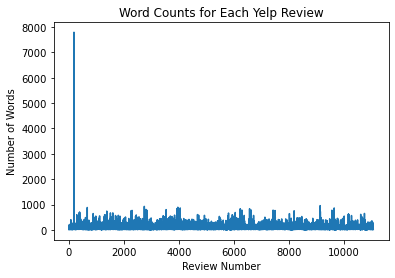

In [5]:
yelp_data_unpacked['Review_Word_Count'].plot()
plt.title('Word Counts for Each Yelp Review')
plt.xlabel('Review Number')
plt.ylabel('Number of Words')

In [6]:
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]

,Alias,Name,Rating,Price,City,Zip_code,Address,Review,Review_Word_Count
184,riviera-caterers-brooklyn,Riviera Caterers,4.5,NaN,Brooklyn,11224,2780 Stillwell Ave,'Got a question about Riviera Caterers? Ask th...,7791


In [8]:
long_review = yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count'] > 1000]['Review'][184]
long_review

'\'Got a question about Riviera Caterers? Ask the Yelp community!, I had my wedding here a month ago and I would give Riviera10 stars if I could. It was such a joy and ease to work with Adam, Tommy, and their staff. A true diamond in the rough of Coney Island and the best value out there for Brooklyn weddings! Extremely recommend this place.First, the space has been recently remodeled and it is truly gorgeous and modern. You dont have to worry about bringing in much of your own decorations - our florals, ceremony, table settings, and photos looked stunning against the Rivieras backdrop.The service of the Riviera staff was also impeccable. Up to the wedding, they were responsive and helpful and kind. During our wedding, the staff took extreme care of us and our guests, and over-checked on us every step of the way. I felt very taken care of. At the end of the night, waiters had trays of water waiting for everyone as they headed home from the party. They even put champagne in the bathroom

# Removing Stop Words

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [13]:
yelp_data_unpacked['Lowercase'] = yelp_data_unpacked['Review'].apply(lambda x: ' '.join(word.lower() for word in str(x).split()))

In [14]:
yelp_data_unpacked['Cleaned'] = yelp_data_unpacked['Lowercase'].str.replace('[^\w\s]', '')

In [15]:
Reviews_noStopWords = []

for i in range(len(yelp_data_unpacked)):
    
    review = str(yelp_data_unpacked['Cleaned'][i])
    review = review.lower()
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(review)
    filtered_sentence = []
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    
    Reviews_noStopWords.append(filtered_sentence)

In [16]:
yelp_data_unpacked['No_Stop_Words:Tokens'] = Reviews_noStopWords

In [17]:
yelp_data_unpacked['No_Stop_Words:Sentence'] = Reviews_noStopWords
for i in range(len(yelp_data_unpacked)): 
    text_list = yelp_data_unpacked['No_Stop_Words:Tokens'][i]
    blank = ''
    for word in text_list:
        blank = blank+' '+word
    yelp_data_unpacked['No_Stop_Words:Sentence'][i] = blank

In [18]:
yelp_data_unpacked['No_Stop_Words:Sentence']

0         chocolate cups amazing eating years always ta...
1         morris park bake shop become go spot atmosphe...
2         thought cookies biscotti pretty good definite...
3         guys im big time biscotti connoisseur always ...
4         craving special type cake ice cream layer reg...
                               ...                        
11061     food drinks amazing went catch friend havent ...
11062     frequently come restaurant almost three times...
11063     went back yesterday omg lobsters back ordered...
11064     johnnys little cleaner type fast food indoor ...
11065     tonys definitely one favorite spots go quick ...
Name: No_Stop_Words:Sentence, Length: 11066, dtype: object

In [19]:
Stop_Word_Count = []
for i in range(len(yelp_data_unpacked)):
    review = str(yelp_data_unpacked['Review'][i]).lower()
    count = 0
    for word in review.split():
        if word in stop_words:
            count += 1
    Stop_Word_Count.append(count)

yelp_data_unpacked['Stop_Word_Count'] = Stop_Word_Count

In [44]:
full = yelp_data_unpacked['Review_Word_Count']
partial = yelp_data_unpacked['Stop_Word_Count']

yelp_data_unpacked['Stop_Words_%'] = partial/full

# Stemming and Lemmatization

In [20]:
import textblob
from textblob import Word

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gogik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
yelp_data_unpacked['Lemmatized'] = yelp_data_unpacked['No_Stop_Words:Sentence'].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))

In [24]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

In [25]:
stemmed_list = []
stemmed_tokens_list = []
for i in range(len(yelp_data_unpacked)):
    sentence = yelp_data_unpacked['Lemmatized'][i]
    wordList = nltk.word_tokenize(sentence)
    stemWords = [snowBallStemmer.stem(word) for word in wordList]
    
    stemmed = ' '.join(stemWords)
    stemmed_list.append(stemmed)

In [26]:
yelp_data_unpacked['Stemmed:Sentence'] = stemmed_list

In [27]:
def word_extraction(sentence):   
    words = sentence.split()    
    cleaned_text = [w.lower() for w in words]    
    return cleaned_text

In [28]:
for i in range(len(yelp_data_unpacked)):
    stemmed = yelp_data_unpacked['Stemmed:Sentence'][i]
    tokens = word_extraction(stemmed)
    stemmed_tokens_list.append(tokens)

In [29]:
yelp_data_unpacked['Stemmed:Tokens'] = stemmed_tokens_list

In [30]:
yelp_data_unpacked['Stemmed:Tokens'][1]

['morri',
 'park',
 'bake',
 'shop',
 'becom',
 'go',
 'spot',
 'atmospher',
 'place',
 'great',
 'invit',
 'love',
 'everi',
 'thing',
 'order',
 'staff',
 'realli',
 'pleasant',
 'definit',
 'help',
 'anyth',
 'definit',
 'come',
 'back',
 'morri',
 'park',
 'bake',
 'shop']

In [31]:
yelp_data_unpacked['Stemmed_Word_Count'] = yelp_data_unpacked['Stemmed:Sentence'].apply(lambda x: len(str(x).split()))

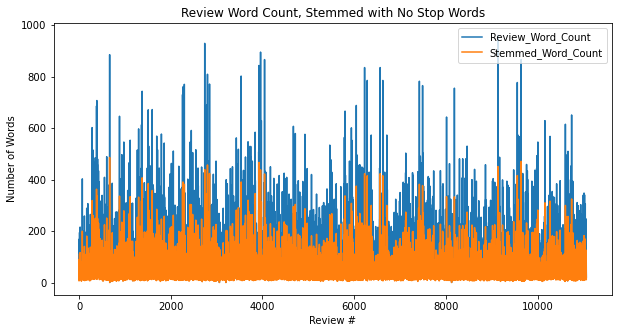

In [32]:
plt.figure(figsize=(10,5))
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
yelp_data_unpacked[yelp_data_unpacked['Stemmed_Word_Count']< 1000]['Stemmed_Word_Count'].plot()
plt.title('Review Word Count, Stemmed with No Stop Words')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

# Positive Opinion Lexicon

In [33]:
file = open("positive_lexicon.txt", "r")
content = file.read()
pos_lex = content.splitlines()
pos_lex_stem = [snowBallStemmer.stem(word) for word in pos_lex]

In [34]:
good_count = []
for i in range(len(yelp_data_unpacked)):
    count = 0
    tokens = yelp_data_unpacked['Stemmed:Tokens'][i]
    for word in tokens:
        if word in pos_lex_stem:
            count += 1
    good_count.append(count)

In [35]:
yelp_data_unpacked['Positive_Word_Count'] = good_count

In [36]:
yelp_data_unpacked['Positive_Words_%'] = yelp_data_unpacked['Positive_Word_Count']/(yelp_data_unpacked['Review_Word_Count']-yelp_data_unpacked['Stop_Word_Count'])

Text(0, 0.5, 'Percentage')

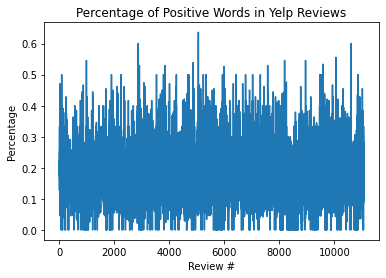

In [37]:
yelp_data_unpacked['Positive_Words_%'].plot()
plt.title('Percentage of Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Percentage')

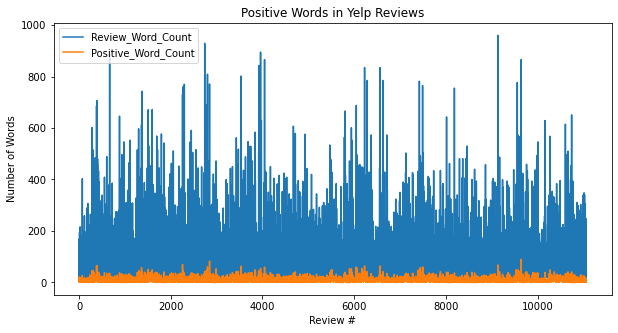

In [38]:
plt.figure(figsize=(10,5))
yelp_data_unpacked[yelp_data_unpacked['Review_Word_Count']< 2000]['Review_Word_Count'].plot()
yelp_data_unpacked[yelp_data_unpacked['Positive_Word_Count']< 600]['Positive_Word_Count'].plot()
plt.title('Positive Words in Yelp Reviews')
plt.xlabel('Review #')
plt.ylabel('Number of Words')
plt.legend()

In [39]:
from textblob import TextBlob

In [40]:
yelp_data_unpacked['Polarity'] = yelp_data_unpacked['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
yelp_data_unpacked['Subjectivity'] = yelp_data_unpacked['Lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [41]:
yelp_data_unpacked

,Alias,Name,Rating,Price,City,Zip_code,Address,Review,Review_Word_Count,Lowercase,...,No_Stop_Words:Sentence,Stop_Word_Count,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Polarity,Subjectivity
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'The chocolate cups are amazing! Have been eat...,16,'the chocolate cups are amazing! have been eat...,...,chocolate cups amazing eating years always ta...,7,chocolate cup amazing eating year always taste...,chocol cup amaz eat year alway tast fantast,"[chocol, cup, amaz, eat, year, alway, tast, fa...",8,2,0.222222,0.500000,0.900000
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Morris Park Bake Shop has become my go to spo...,49,'morris park bake shop has become my go to spo...,...,morris park bake shop become go spot atmosphe...,20,morris park bake shop become go spot atmospher...,morri park bake shop becom go spot atmospher p...,"[morri, park, bake, shop, becom, go, spot, atm...",28,6,0.206897,0.338889,0.552778
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I thought the cookies and biscotti were prett...,122,'i thought the cookies and biscotti were prett...,...,thought cookies biscotti pretty good definite...,53,thought cooky biscotti pretty good definitely ...,thought cooki biscotti pretti good definit tas...,"[thought, cooki, biscotti, pretti, good, defin...",61,9,0.130435,0.314583,0.438194
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Guys.... so Im a big time biscotti connoisseu...,169,'guys.... so im a big time biscotti connoisseu...,...,guys im big time biscotti connoisseur always ...,75,guy im big time biscotti connoisseur always hu...,guy im big time biscotti connoisseur alway hun...,"[guy, im, big, time, biscotti, connoisseur, al...",90,12,0.127660,0.238068,0.587311
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I had a craving for a special type of cake wi...,59,'i had a craving for a special type of cake wi...,...,craving special type cake ice cream layer reg...,27,craving special type cake ice cream layer regu...,crave special type cake ice cream layer regula...,"[crave, special, type, cake, ice, cream, layer...",30,7,0.218750,0.314643,0.536044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11061,tonys-pier-restaurant-bronx,Tony's Pier Restaurant,3.5,$$,Bronx,10464,1 City Island Ave,'The food and drinks were amazing. I went ther...,47,'the food and drinks were amazing. i went ther...,...,food drinks amazing went catch friend havent ...,26,food drink amazing went catch friend havent se...,food drink amaz went catch friend havent seen ...,"[food, drink, amaz, went, catch, friend, haven...",19,5,0.238095,0.650000,0.737500
11062,tonys-pier-restaurant-bronx,Tony's Pier Restaurant,3.5,$$,Bronx,10464,1 City Island Ave,'I frequently come to this restaurant almost t...,60,'i frequently come to this restaurant almost t...,...,frequently come restaurant almost three times...,21,frequently come restaurant almost three time m...,frequent come restaur almost three time month ...,"[frequent, come, restaur, almost, three, time,...",39,11,0.282051,0.404167,0.589583
11063,tonys-pier-restaurant-bronx,Tony's Pier Restaurant,3.5,$$,Bronx,10464,1 City Island Ave,'I just went back yesterday and OMG the Lobste...,82,'i just went back yesterday and omg the lobste...,...,went back yesterday omg lobsters back ordered...,35,went back yesterday omg lobster back ordered 4...,went back yesterday omg lobster back order 4 b...,"[went, back, yesterday, omg, lobster, back, or...",45,10,0.212766,0.375000,0.446875
11064,tonys-pier-restaurant-bronx,Tony's Pier Restaurant,3.5,$$,Bronx,10464,1 City Island Ave,'Been to Johnnys. A little cleaner here for th...,58,'been to johnnys. a little cleaner h

In [42]:
yelp_data_unpacked.columns

Index(['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'Lowercase', 'Cleaned',
       'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence', 'Stop_Word_Count',
       'Lemmatized', 'Stemmed:Sentence', 'Stemmed:Tokens',
       'Stemmed_Word_Count', 'Positive_Word_Count', 'Positive_Words_%',
       'Polarity', 'Subjectivity'],
      dtype='object')

In [45]:
yelp_data_analyzed = yelp_data_unpacked[['Alias', 'Name', 'Rating', 'Price', 'City', 'Zip_code', 'Address',
       'Review', 'Review_Word_Count', 'No_Stop_Words:Tokens', 'No_Stop_Words:Sentence',
       'Stop_Word_Count', 'Stop_Words_%', 'Lemmatized', 'Stemmed:Sentence',
       'Stemmed:Tokens', 'Polarity','Positive_Word_Count', 'Positive_Words_%','Stemmed_Word_Count']]

In [46]:
yelp_data_analyzed.to_csv(r'yelp_data_analyzed.csv',index=False)

-------------------------------------END-------------------------------------------------------------------------------------